### 1. EDA using Pandas

__Importing library__

In [87]:
import pandas as pd

__Reading the dataset__

In [88]:
df = pd.read_csv("dataset.csv")

__Checking the data types__

In [89]:
df.dtypes

id                     int64
title                 object
genre                 object
original_language     object
overview              object
popularity           float64
release_date          object
vote_average         float64
vote_count             int64
dtype: object

__Checking the data__

In [90]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


__Summary of data__

In [91]:
df.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


### 2. EDA using Pyspark

__Importing Necessary Libraries__

In [92]:
import os, sys
from pyspark.sql import SparkSession
import pyspark.sql.functions as fun

__Creating a Spark Session__

In [93]:
spark = SparkSession.builder.master("local[2]").appName("Movie").getOrCreate()

In [94]:
spark

__Reading the csv file__

In [95]:
movies = spark.read.csv("dataset.csv", header=True)

__Checking the Schema__

In [96]:
movies.printSchema()

root
 |-- id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genre: string (nullable = true)
 |-- original_language: string (nullable = true)
 |-- overview: string (nullable = true)
 |-- popularity: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- vote_average: string (nullable = true)
 |-- vote_count: string (nullable = true)



__Data Frame__

In [97]:
movies.show()

+------+--------------------+--------------------+-----------------+--------------------+----------+------------+------------+----------+
|    id|               title|               genre|original_language|            overview|popularity|release_date|vote_average|vote_count|
+------+--------------------+--------------------+-----------------+--------------------+----------+------------+------------+----------+
|   278|The Shawshank Red...|         Drama,Crime|               en|Framed in the 194...|    94.075|  1994-09-23|         8.7|     21862|
| 19404|Dilwale Dulhania ...|Comedy,Drama,Romance|               hi|Raj is a rich, ca...|    25.408|  1995-10-19|         8.7|      3731|
|   238|       The Godfather|         Drama,Crime|               en|Spanning the year...|    90.585|  1972-03-14|         8.7|     16280|
|   424|    Schindler's List|   Drama,History,War|               en|The true story of...|    44.761|  1993-12-15|         8.6|     12959|
|   240|The Godfather: Pa...|     

__Count of total rows and columns__

In [98]:
movies.count(), len(movies.columns)

(10005, 9)

__Visualize the rating given by users__

Text(0, 0.5, 'count of rating')

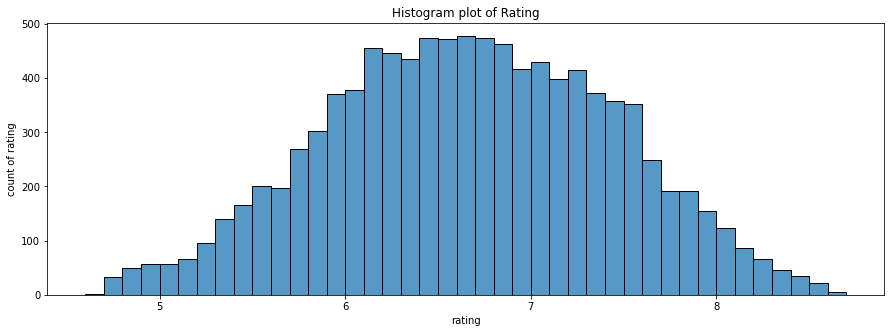

In [134]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,5))
sns.histplot(df['vote_average'])
plt.title("Histogram plot of Rating")
plt.xlabel('rating')
plt.ylabel('count of rating')
#plt.xlim([1,10])

The plot shows that most of the ratings lie between 4.5 and 8.5.

__Visualize the rating vs counts__

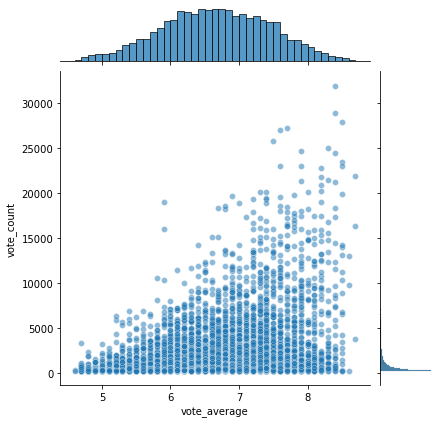

In [100]:
sns.jointplot(x='vote_average',y='vote_count',data=df,alpha=0.5)

 __Count of null values in each column__

In [101]:
movies.agg(*[fun.count(fun.when(fun.isnull(column), column)).alias(column) for column in movies.columns]).show()

+---+-----+-----+-----------------+--------+----------+------------+------------+----------+
| id|title|genre|original_language|overview|popularity|release_date|vote_average|vote_count|
+---+-----+-----+-----------------+--------+----------+------------+------------+----------+
|  0|    0|    3|                0|      13|         6|           6|           8|         8|
+---+-----+-----+-----------------+--------+----------+------------+------------+----------+



__Summary of data__

In [102]:
movies.describe().show()

+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|summary|                  id|               title|               genre|   original_language|            overview|          popularity|        release_date|        vote_average|        vote_count|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+
|  count|               10005|               10005|               10002|               10005|                9992|                9999|                9999|                9997|              9997|
|   mean|          161243.505|  1172.9382272727273|                null|               6.994|              1383.0|   34.95272369243594|  38.651246376811606|   6.759508516568501|1514.8023986727917|
| stddev|   211

__Displaying all the field present in data__

In [103]:
for field in movies.schema.fields:
    print(field.name)

id
title
genre
original_language
overview
popularity
release_date
vote_average
vote_count


### 3. Feature Selection

In [104]:
movies = movies.select('id', 'title', 'genre', 'overview')

__Dataset with selected features__

In [105]:
movies.show()

+------+--------------------+--------------------+--------------------+
|    id|               title|               genre|            overview|
+------+--------------------+--------------------+--------------------+
|   278|The Shawshank Red...|         Drama,Crime|Framed in the 194...|
| 19404|Dilwale Dulhania ...|Comedy,Drama,Romance|Raj is a rich, ca...|
|   238|       The Godfather|         Drama,Crime|Spanning the year...|
|   424|    Schindler's List|   Drama,History,War|The true story of...|
|   240|The Godfather: Pa...|         Drama,Crime|In the continuing...|
|667257|   Impossible Things|        Family,Drama|Matilde is a woma...|
|   129|       Spirited Away|Animation,Family,...|A young girl, Chi...|
|730154|      Your Eyes Tell|       Romance,Drama|A tragic accident...|
|372754|Dou kyu sei – Cla...|   Romance,Animation|Rihito Sajo, an h...|
|372058|          Your Name.|Romance,Animation...|High schoolers Mi...|
|   389|        12 Angry Men|               Drama|The defense an

__Counting null values in selected features__

In [106]:
movies.select([fun.count(fun.when(fun.col(columns).isNull(), columns)).alias(columns) for columns in movies.columns]).show()

+---+-----+-----+--------+
| id|title|genre|overview|
+---+-----+-----+--------+
|  0|    0|    3|      13|
+---+-----+-----+--------+



__Merging ovweview and genre__

In [107]:
from pyspark.sql.functions import concat
new_data = movies.select('id', 'title', concat(movies.overview, movies.genre).alias("tags"))
new_data.show()

+------+--------------------+--------------------+
|    id|               title|                tags|
+------+--------------------+--------------------+
|   278|The Shawshank Red...|Framed in the 194...|
| 19404|Dilwale Dulhania ...|Raj is a rich, ca...|
|   238|       The Godfather|Spanning the year...|
|   424|    Schindler's List|The true story of...|
|   240|The Godfather: Pa...|In the continuing...|
|667257|   Impossible Things|Matilde is a woma...|
|   129|       Spirited Away|A young girl, Chi...|
|730154|      Your Eyes Tell|A tragic accident...|
|372754|Dou kyu sei – Cla...|Rihito Sajo, an h...|
|372058|          Your Name.|High schoolers Mi...|
|   389|        12 Angry Men|The defense and t...|
|696374|   Gabriel's Inferno|An intriguing and...|
|496243|            Parasite|All unemployed, K...|
|   497|      The Green Mile|A supernatural ta...|
|724089|Gabriel's Inferno...|Professor Gabriel...|
|   155|     The Dark Knight|Batman raises the...|
|   429|The Good, the Bad...|Wh

__Casting id to integer__

In [108]:
new_data = new_data.withColumn("id", new_data.id.cast("Integer"))

__Displaying new dataset__

In [109]:
new_data.show()

+------+--------------------+--------------------+
|    id|               title|                tags|
+------+--------------------+--------------------+
|   278|The Shawshank Red...|Framed in the 194...|
| 19404|Dilwale Dulhania ...|Raj is a rich, ca...|
|   238|       The Godfather|Spanning the year...|
|   424|    Schindler's List|The true story of...|
|   240|The Godfather: Pa...|In the continuing...|
|667257|   Impossible Things|Matilde is a woma...|
|   129|       Spirited Away|A young girl, Chi...|
|730154|      Your Eyes Tell|A tragic accident...|
|372754|Dou kyu sei – Cla...|Rihito Sajo, an h...|
|372058|          Your Name.|High schoolers Mi...|
|   389|        12 Angry Men|The defense and t...|
|696374|   Gabriel's Inferno|An intriguing and...|
|496243|            Parasite|All unemployed, K...|
|   497|      The Green Mile|A supernatural ta...|
|724089|Gabriel's Inferno...|Professor Gabriel...|
|   155|     The Dark Knight|Batman raises the...|
|   429|The Good, the Bad...|Wh

__Converting the new dataset to pandas dataframe__

In [110]:
final_df = new_data.toPandas()

__Checking the type of 'tags' column__

In [111]:
type(final_df["tags"][0])

str

### 4. Natural Language Processing(NLP)

__Importing nlp libraries__

In [112]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

__Tokenize the words in each line of 'tags'__

In [113]:
tokens = []
for i in range(len(final_df)):
    tokens.append(word_tokenize(str(final_df["tags"][i])))

__First row of 'tags' column__

In [114]:
tokens[0]

['Framed',
 'in',
 'the',
 '1940s',
 'for',
 'the',
 'double',
 'murder',
 'of',
 'his',
 'wife',
 'and',
 'her',
 'lover',
 ',',
 'upstanding',
 'banker',
 'Andy',
 'Dufresne',
 'begins',
 'a',
 'new',
 'life',
 'at',
 'the',
 'Shawshank',
 'prison',
 ',',
 'where',
 'he',
 'puts',
 'his',
 'accounting',
 'skills',
 'to',
 'work',
 'for',
 'an',
 'amoral',
 'warden',
 '.',
 'During',
 'his',
 'long',
 'stretch',
 'in',
 'prison',
 ',',
 'Dufresne',
 'comes',
 'to',
 'be',
 'admired',
 'by',
 'the',
 'other',
 'inmates',
 '--',
 'including',
 'an',
 'older',
 'prisoner',
 'named',
 'Red',
 '--',
 'for',
 'his',
 'integrity',
 'and',
 'unquenchable',
 'sense',
 'of',
 'hope.Drama',
 ',',
 'Crime']

__Making a stopword list and extending some extra characters present in tags__

In [115]:
stopwordsList = stopwords.words("english")
stopwordsList.extend([',','.','-','--','!'])

__Removing stopwords__

In [116]:
wordList=[]
for tokenList in tokens:
    words=[]
    for word in tokenList:
        if word.lower() not in stopwordsList:
            words.append(word.lower())
            
    wordList.append(words)

wordList[0]

['framed',
 '1940s',
 'double',
 'murder',
 'wife',
 'lover',
 'upstanding',
 'banker',
 'andy',
 'dufresne',
 'begins',
 'new',
 'life',
 'shawshank',
 'prison',
 'puts',
 'accounting',
 'skills',
 'work',
 'amoral',
 'warden',
 'long',
 'stretch',
 'prison',
 'dufresne',
 'comes',
 'admired',
 'inmates',
 'including',
 'older',
 'prisoner',
 'named',
 'red',
 'integrity',
 'unquenchable',
 'sense',
 'hope.drama',
 'crime']

__Lemmatizing verbs to their first form__

In [117]:
wnet=WordNetLemmatizer()

for i in range(len(wordList)):
    for j in range(len(wordList[i])):
        wordList[i][j]=wnet.lemmatize(wordList[i][j],pos='v')
        
wordList[0]

['frame',
 '1940s',
 'double',
 'murder',
 'wife',
 'lover',
 'upstanding',
 'banker',
 'andy',
 'dufresne',
 'begin',
 'new',
 'life',
 'shawshank',
 'prison',
 'put',
 'account',
 'skills',
 'work',
 'amoral',
 'warden',
 'long',
 'stretch',
 'prison',
 'dufresne',
 'come',
 'admire',
 'inmates',
 'include',
 'older',
 'prisoner',
 'name',
 'red',
 'integrity',
 'unquenchable',
 'sense',
 'hope.drama',
 'crime']

__Joining tokens back to form a string__

In [118]:
for i in range(len(tokens)):
    tokens[i]=' '.join(wordList[i])

__Displaying processed tags__

In [119]:
tokens[0]

'frame 1940s double murder wife lover upstanding banker andy dufresne begin new life shawshank prison put account skills work amoral warden long stretch prison dufresne come admire inmates include older prisoner name red integrity unquenchable sense hope.drama crime'

__Forming Countvector__

In [120]:
cv = CountVectorizer(max_features=10005)

__Transforming tokens__

In [121]:
vector=cv.fit_transform(tokens).toarray()

__Dispalying vector array__

In [122]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

__Shape of vector__

In [123]:
vector.shape

(10005, 10005)

### 5. Similarity calculation

__Importing cosine similarity__

In [124]:
from sklearn.metrics.pairwise import cosine_similarity

__Calculating similarity of each movie with every movie__

In [125]:
similarity=cosine_similarity(vector)

__Displaying similarity matrix__

In [126]:
similarity

array([[1.        , 0.05143445, 0.1228683 , ..., 0.06666667, 0.10660036,
        0.06299408],
       [0.05143445, 1.        , 0.06825236, ..., 0.        , 0.03289758,
        0.        ],
       [0.1228683 , 0.06825236, 1.        , ..., 0.02948839, 0.06286946,
        0.08359173],
       ...,
       [0.06666667, 0.        , 0.02948839, ..., 1.        , 0.08528029,
        0.03779645],
       [0.10660036, 0.03289758, 0.06286946, ..., 0.08528029, 1.        ,
        0.04029115],
       [0.06299408, 0.        , 0.08359173, ..., 0.03779645, 0.04029115,
        1.        ]])

### 6. Recommendation function

In [127]:
def recommend(movies):
    index=final_df[final_df['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[1:11]:
        print(final_df.iloc[i[0]].title)

__Checking for custom input__

In [128]:
recommend("Avengers: Endgame")

Avengers: Infinity War
Replicant
Justice League Dark: Apokolips War
Captain Marvel
Next Avengers: Heroes of Tomorrow
Dragon Ball Z: The Return of Cooler
Valerian and the City of a Thousand Planets
Star Wars: The Rise of Skywalker
Guardians of the Galaxy Vol. 2
Batman: Gotham Knight


### 7. Storing files 

In [129]:
import pickle

__Storing movies list__

In [130]:
pickle.dump(final_df, open('movies_list.pkl', 'wb'))

__Storing similarities__

In [131]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

__Loading stored files__

In [132]:
pickle.load(open('similarity.pkl', 'rb'))

array([[1.        , 0.05143445, 0.1228683 , ..., 0.06666667, 0.10660036,
        0.06299408],
       [0.05143445, 1.        , 0.06825236, ..., 0.        , 0.03289758,
        0.        ],
       [0.1228683 , 0.06825236, 1.        , ..., 0.02948839, 0.06286946,
        0.08359173],
       ...,
       [0.06666667, 0.        , 0.02948839, ..., 1.        , 0.08528029,
        0.03779645],
       [0.10660036, 0.03289758, 0.06286946, ..., 0.08528029, 1.        ,
        0.04029115],
       [0.06299408, 0.        , 0.08359173, ..., 0.03779645, 0.04029115,
        1.        ]])

In [133]:
pickle.load(open('movies_list.pkl', 'rb'))

,id,title,tags
0,278.0,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404.0,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238.0,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424.0,Schindler's List,The true story of how businessman Oskar Schind...
4,240.0,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
10000,10196.0,The Last Airbender,"The story follows the adventures of Aang, a yo..."
10001,331446.0,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
10002,13995.0,Captain America,"""During World War II, a brave, patriotic Ameri..."
10003,2312.0,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
